<a href="https://colab.research.google.com/github/SAGAR-NAYAK2000/K-means-Spectral-clustering-on-twitter-dataset/blob/main/Sagar2_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports

#Computing
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

#Clustering
from sklearn.cluster import KMeans,SpectralClustering
from yellowbrick.cluster import KElbowVisualizer

#Decomposition
from sklearn.decomposition import PCA, TruncatedSVD

#Text
import unicodedata, re, string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

#Default

import os

In [2]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df1 = pd.read_csv('/content/gdrive/MyDrive/data/text_classification_dataset.csv')

In [5]:
df1.head()

,text,type
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports
2,The current state of last year's @BBL finalist...,sports
3,@HOLLYJISOO Why did you bring a cricket...,sports
4,Babar Azam only Pakistani included in the ICC ...,sports


In [6]:
#Some basic information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1162 non-null   object
 1   type    1162 non-null   object
dtypes: object(2)
memory usage: 18.3+ KB


In [7]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_len_2(words):
    """Remove all the words with len <= 2"""
    new_words = []
    for word in words:
        if len(word)<=2:
            pass
        else:
            new_words.append(word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_len_2(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    return words

In [8]:
df1.head()

,text,type
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports
2,The current state of last year's @BBL finalist...,sports
3,@HOLLYJISOO Why did you bring a cricket...,sports
4,Babar Azam only Pakistani included in the ICC ...,sports


In [9]:
import nltk
nltk.download('punkt')
#Tokenize text
df1['Tokenized']=df1['text'].apply(nltk.word_tokenize)
df1.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,type,Tokenized
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi..."
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011..."
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B..."
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick..."
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t..."


In [10]:
import nltk
nltk.download('stopwords')
#Normalize text
df1['Clean_text']=df1['Tokenized'].apply(lambda y: normalize(y))
df1['Clean_text'][:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [acni, thetoka, never, knew, followers, anythi...
1    [myca, magical, moments, september, sham, chot...
2    [current, state, last, year, bbl, finalists, s...
3                         [hollyjisoo, bring, cricket]
4    [babar, azam, pakistani, included, icc, odi, t...
5    [iexpresssports, indvaus, rishabh, pant, ruled...
6    [thinkboisefirst, boisefryco, amp, idaho, comp...
7    [gabbbarsingh, surprised, lot, people, nt, see...
8    [bcci, icc, odi, cricketer, year, award, goes,...
9    [wajidafridi, yearofteamisf, imran, khan, play...
Name: Clean_text, dtype: object

In [11]:
"""Function to reconvert a tokenization into a single string
This is needed for the TfIdfVectorizer method """
def conv2str(y):  
     
    str1 = " "   
    return (str1.join(y)) 

In [12]:
df1['Clean_text1']=df1['Clean_text'].apply(lambda y: conv2str(y))
df1.head()

,text,type,Tokenized,Clean_text,Clean_text1
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi...",acni thetoka never knew followers anything rea...
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot...",myca magical moments september sham chotoo bow...
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s...",current state last year bbl finalists starsbbl...
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]",hollyjisoo bring cricket
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t...",babar azam pakistani included icc odi team yea...


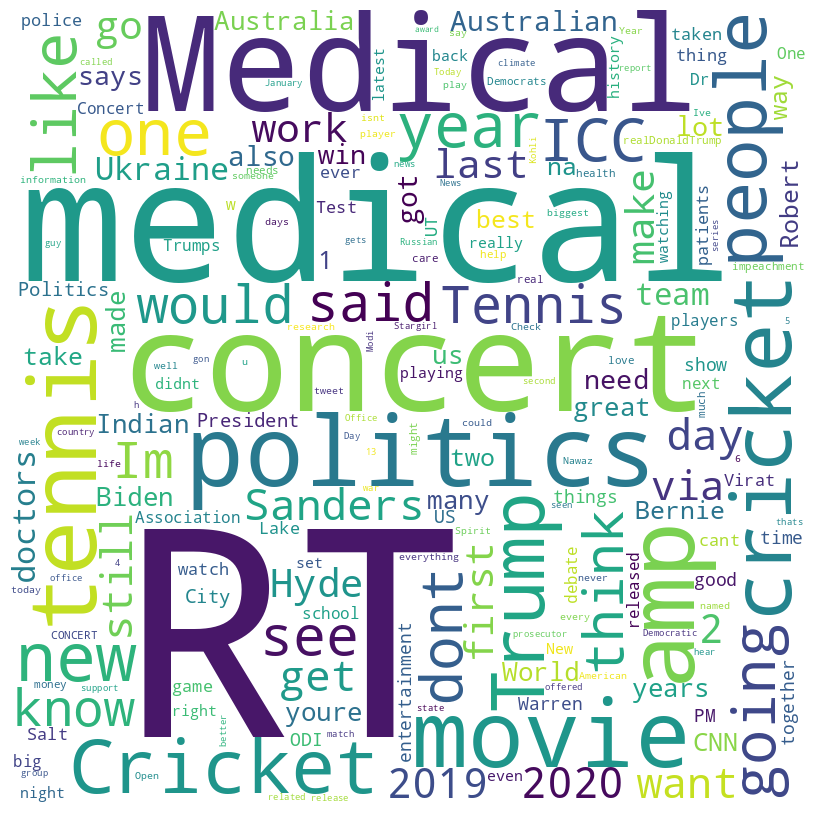

In [13]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# # Load the Twitter dataset into a pandas dataframe
# df = pd.read_csv('twitter_dataset.csv')

# Concatenate all tweets into a single string
text = ' '.join(df1['text'].values)

# Remove URLs and special characters
text = re.sub(r'http\S+', '', text) # remove URLs
text = re.sub(r'[^\w\s]', '', text) # remove special characters

# Tokenize the string into individual words
words = nltk.word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.lower() not in stop_words]

# Create a frequency distribution of the remaining words
freq_dist = nltk.FreqDist(words)

# Use the frequency distribution to generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(freq_dist)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

# # # assume the Twitter dataset is stored in a CSV file named "tweets.csv"
# # tweets_df = pd.read_csv("tweets.csv")

# # extract the text of the tweets
# tweets_text = df1["Clean_text1"].tolist()

# # create a TfidfVectorizer object to convert text to a matrix of TF-IDF features
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words="english")
# X = vectorizer.fit_transform(tweets_text)
# tfidf_array = np.asarray(X.toarray())

# """First cluster using KMeans and run the elbow visualizer to find the best number of clusters"""
# modelKm = KMeans(random_state=12)
# visualizer = KElbowVisualizer(modelKm, k=(1,12))

# visualizer.fit(tfidf_array)        # Fit the data to the visualizer
# visualizer.show() 



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

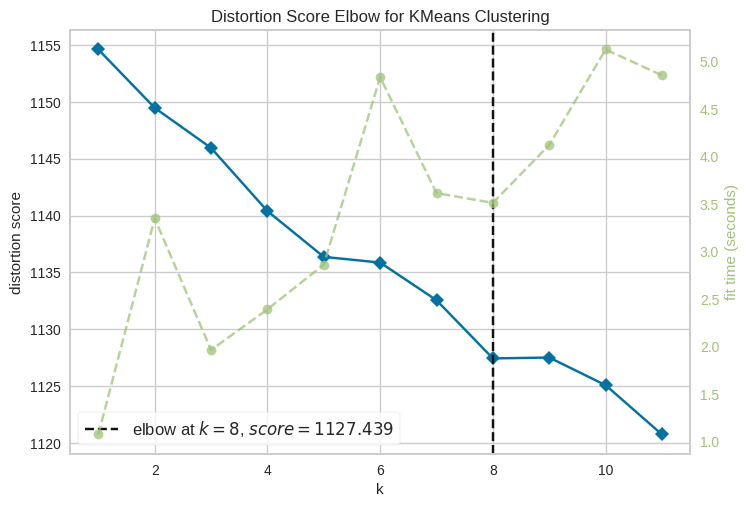

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
"""Apply the TF_idf vectorizer to get the sparse matrix of the TF_IDF process"""

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df1['Clean_text1'])
tfidf_array = np.asarray(X.toarray())

"""First cluster using KMeans and run the elbow visualizer to find the best number of clusters"""
modelKm = KMeans(random_state=12)
visualizer = KElbowVisualizer(modelKm, k=(1,12))

visualizer.fit(tfidf_array)        # Fit the data to the visualizer
visualizer.show() 

In [16]:
print(X)
print(X.toarray()[0][1162])

  (0, 5548)	0.39924737822533285
  (0, 2443)	0.09825339902775576
  (0, 3172)	0.37726944835769183
  (0, 4248)	0.3616758589560702
  (0, 1989)	0.37726944835769183
  (0, 2876)	0.3616758589560702
  (0, 5778)	0.37726944835769183
  (0, 60)	0.37726944835769183
  (1, 5673)	0.2801401473906458
  (1, 1213)	0.13753329122191243
  (1, 6380)	0.25377731692556676
  (1, 3221)	0.26471888015570527
  (1, 2754)	0.26471888015570527
  (1, 1001)	0.24529038113810536
  (1, 2136)	0.25377731692556676
  (1, 643)	0.24529038113810536
  (1, 635)	0.2801401473906458
  (1, 937)	0.2801401473906458
  (1, 4675)	0.2801401473906458
  (1, 4633)	0.26471888015570527
  (1, 3397)	0.24529038113810536
  (1, 3150)	0.25377731692556676
  (1, 3468)	0.2801401473906458
  (1, 2443)	0.0689415214387022
  (2, 4336)	0.3256990512098425
  :	:
  (1160, 5187)	0.34589807573051207
  (1160, 468)	0.34589807573051207
  (1160, 2212)	0.34589807573051207
  (1160, 251)	0.32685693967208923
  (1160, 467)	0.32685693967208923
  (1160, 4199)	0.3028679452808328
  

In [17]:
"""A simple view of the feature names"""
print(vectorizer.get_feature_names_out()[:10])

['_asheeanuar' '_blusummers' '_chriscb' '_deepakanand' '_fedenerazzurra'
 '_fifie' '_jd_black' '_seanohue' 'aaahh' 'aaj']


/usr/local/lib/python3.9/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.9/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


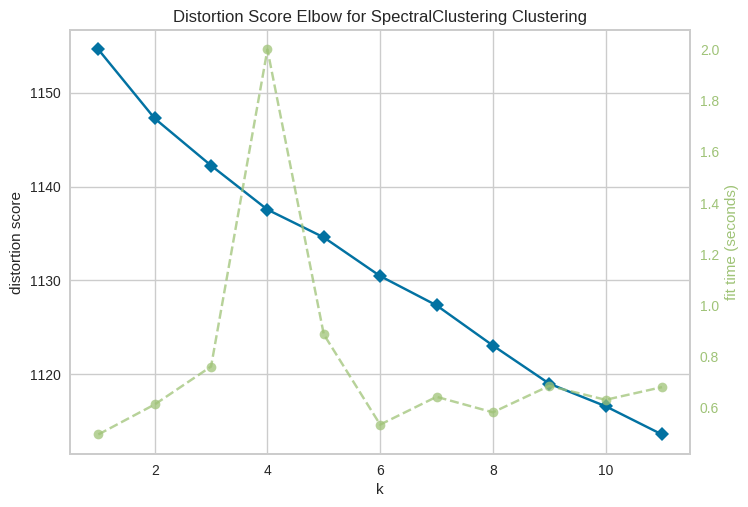

<Axes: title={'center': 'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
"""First cluster using Spectral and run the elbow visualizer to find the best number of clusters"""
modelSc = SpectralClustering(random_state=5)
visualizer = KElbowVisualizer(modelSc, k=(1,12))

visualizer.fit(tfidf_array)        # Fit the data to the visualizer
visualizer.show() 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.07160935 -0.11221603]
 [ 0.06712282 -0.06069151]
 [ 0.05311817 -0.04196404]
 [ 0.13310393  0.04870202]]


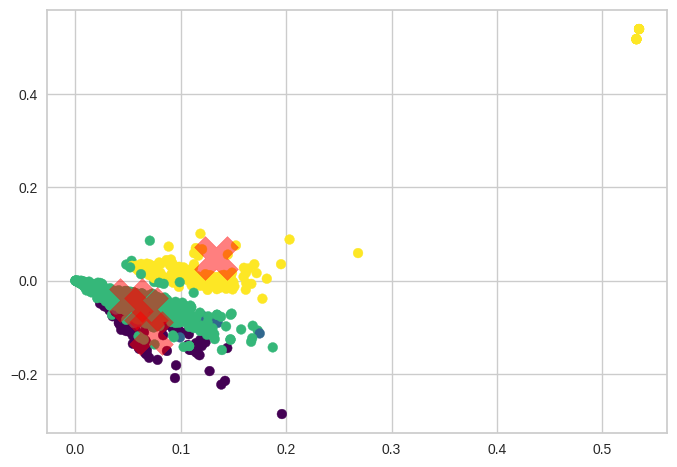

In [19]:
"""Train the Kmeans with the best n of clusters"""
modelKm = KMeans(n_clusters=4,random_state=12)
modelKm.fit(tfidf_array)
y_kmeans = modelKm.predict(tfidf_array)

"""Dimensionality reduction used to plot in 2d representation"""
pc=TruncatedSVD(n_components=2)
X_new=pc.fit_transform(X)
centr=pc.transform(modelKm.cluster_centers_)

print(centr)
plt.scatter(X_new[:,0],X_new[:,1],c=y_kmeans, cmap='viridis')
plt.scatter(centr[:,0],centr[:,1],marker='X',alpha=0.5,color='red',s=1000)

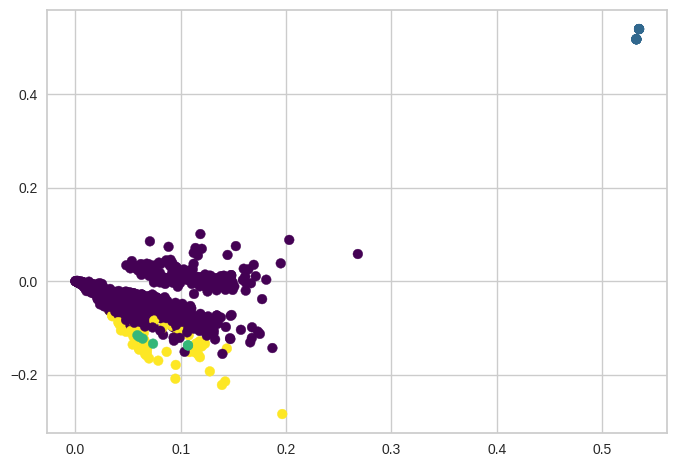

In [20]:
modelSc = SpectralClustering(n_clusters=4, random_state=5)
y_spc=modelSc.fit_predict(tfidf_array)


pc=TruncatedSVD(n_components=2)
X_new=pc.fit_transform(X)

plt.scatter(X_new[:,0],X_new[:,1],c=y_spc, cmap='viridis')

In [21]:
#Rebuild the clusters in pandas df.

df1['ClusterKmeans']=y_kmeans
df1['ClusterSpectral']=y_spc
df1.head()

,text,type,Tokenized,Clean_text,Clean_text1,ClusterKmeans,ClusterSpectral
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi...",acni thetoka never knew followers anything rea...,2,0
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot...",myca magical moments september sham chotoo bow...,0,0
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s...",current state last year bbl finalists starsbbl...,0,3
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]",hollyjisoo bring cricket,0,3
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t...",babar azam pakistani included icc odi team yea...,0,3


In [22]:
#Extract text based on cluster 
clus0_text=df1[df1['ClusterKmeans']==0]
clus1_text=df1[df1['ClusterKmeans']==1]
clus2_text=df1[df1['ClusterKmeans']==2]
clus3_text=df1[df1['ClusterKmeans']==3]

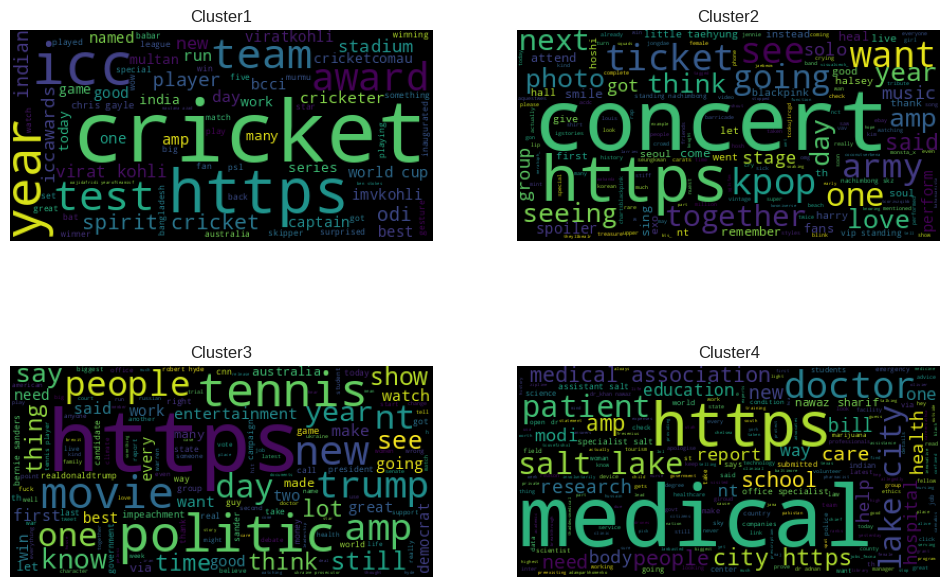

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('Cluster1')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus0_text['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')

plt.subplot(222)
plt.title('Cluster2')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus1_text['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')


plt.subplot(223)
plt.title('Cluster3')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus2_text['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')


plt.subplot(224)
plt.title('Cluster4')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus3_text['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')


plt.show()

In [24]:
#Extract text based on cluster 
clus0_text_sp=df1[df1['ClusterSpectral']==0]
clus1_text_sp=df1[df1['ClusterSpectral']==1]
clus2_text_sp=df1[df1['ClusterSpectral']==2]
clus3_text_sp=df1[df1['ClusterSpectral']==3]

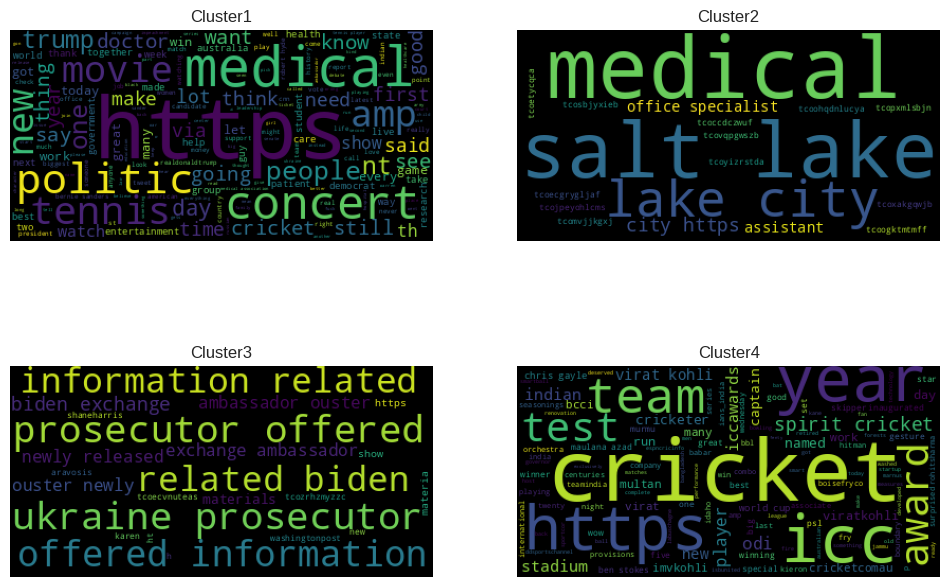

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('Cluster1')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus0_text_sp['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')

plt.subplot(222)
plt.title('Cluster2')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus1_text_sp['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')

plt.subplot(223)
plt.title('Cluster3')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus2_text_sp['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')

plt.subplot(224)
plt.title('Cluster4')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus3_text_sp['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')


plt.show()

In [26]:
df1.head()

,text,type,Tokenized,Clean_text,Clean_text1,ClusterKmeans,ClusterSpectral
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi...",acni thetoka never knew followers anything rea...,2,0
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot...",myca magical moments september sham chotoo bow...,0,0
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s...",current state last year bbl finalists starsbbl...,0,3
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]",hollyjisoo bring cricket,0,3
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t...",babar azam pakistani included icc odi team yea...,0,3


#CHECKING FOR THE LABELS

##FOR SPORTS

In [27]:
#FOR K-MEANS IN SPORTS

import pandas as pd

# extract the cluster number and type columns of the tweets for the "sports" category
sports_clusters = df1[df1["type"] == "sports"][["ClusterKmeans"]]

# find the cluster number that is repeated maximum time for the "sports" category
max_cluster = sports_clusters["ClusterKmeans"].mode().values[0]
max_count = sports_clusters["ClusterKmeans"].value_counts()[max_cluster]

print(f"The cluster number that is repeated maximum time for the 'sports' category is {max_cluster} with a count of {max_count}.")


The cluster number that is repeated maximum time for the 'sports' category is 2 with a count of 162.


In [28]:
#FOR K-MEANS IN SPORTS

import pandas as pd

# extract the cluster number and type columns of the tweets for the "sports" category
sports_clusters = df1[df1["type"] == "sports"][["ClusterSpectral"]]

# find the cluster number that is repeated maximum time for the "sports" category
max_cluster = sports_clusters["ClusterSpectral"].mode().values[0]
max_count = sports_clusters["ClusterSpectral"].value_counts()[max_cluster]

print(f"The cluster number that is repeated maximum time for the 'sports' category is {max_cluster} with a count of {max_count}.")

The cluster number that is repeated maximum time for the 'sports' category is 0 with a count of 190.


#FOR ENTERTAINMENT

In [29]:
#FOR K-MEANS IN ENTERTAINMENT

import pandas as pd

# extract the cluster number and type columns of the tweets for the "entertainment" category
entertainment_clusters = df1[df1["type"] == "entertainment"][["ClusterKmeans"]]

# find the cluster number that is repeated maximum time for the "entertainment" category
max_cluster = entertainment_clusters["ClusterKmeans"].mode().values[0]
max_count = entertainment_clusters["ClusterKmeans"].value_counts()[max_cluster]

print(f"The cluster number that is repeated maximum time for the 'entertainment' category is {max_cluster} with a count of {max_count}.")

The cluster number that is repeated maximum time for the 'entertainment' category is 2 with a count of 162.


In [30]:
#FOR Spectral IN ENTERTAINMENT

import pandas as pd

# extract the cluster number and type columns of the tweets for the "entertainment" category
entertainment_clusters = df1[df1["type"] == "entertainment"][["ClusterSpectral"]]

# find the cluster number that is repeated maximum time for the "entertainment" category
max_cluster = entertainment_clusters["ClusterSpectral"].mode().values[0]
max_count = entertainment_clusters["ClusterSpectral"].value_counts()[max_cluster]

print(f"The cluster number that is repeated maximum time for the 'entertainment' category is {max_cluster} with a count of {max_count}.")

The cluster number that is repeated maximum time for the 'entertainment' category is 0 with a count of 260.


#FOR MEDICAL

In [31]:
#FOR K-MEANS IN MEDICAL

import pandas as pd

# extract the cluster number and type columns of the tweets for the "medical" category
medical_clusters = df1[df1["type"] == "medical"][["ClusterKmeans"]]

# find the cluster number that is repeated maximum time for the "medical" category
max_cluster = medical_clusters["ClusterKmeans"].mode().values[0]
max_count = medical_clusters["ClusterKmeans"].value_counts()[max_cluster]

print(f"The cluster number that is repeated maximum time for the 'medical' category is {max_cluster} with a count of {max_count}.")

The cluster number that is repeated maximum time for the 'medical' category is 3 with a count of 186.


In [32]:
#FOR SPECTRAL IN MEDICAL

import pandas as pd

# extract the cluster number and type columns of the tweets for the "medical" category
medical_clusters = df1[df1["type"] == "medical"][["ClusterSpectral"]]

# find the cluster number that is repeated maximum time for the "medical" category
max_cluster = medical_clusters["ClusterSpectral"].mode().values[0]
max_count = medical_clusters["ClusterSpectral"].value_counts()[max_cluster]

print(f"The cluster number that is repeated maximum time for the 'medical' category is {max_cluster} with a count of {max_count}.")

The cluster number that is repeated maximum time for the 'medical' category is 0 with a count of 287.


#FOR POLITICS

In [33]:
#FOR K-MEANS IN POLITICS
import pandas as pd

# extract the cluster number and type columns of the tweets for the "medical" category
politics_clusters = df1[df1["type"] == "politics"][["ClusterKmeans"]]

# find the cluster number that is repeated maximum time for the "medical" category
max_cluster = politics_clusters["ClusterKmeans"].mode().values[0]
max_count = politics_clusters["ClusterKmeans"].value_counts()[max_cluster]

print(f"The cluster number that is repeated maximum time for the 'politics' category is {max_cluster} with a count of {max_count}.")

The cluster number that is repeated maximum time for the 'politics' category is 2 with a count of 345.


In [34]:
#FOR K-MEANS IN POLITICS
import pandas as pd

# extract the cluster number and type columns of the tweets for the "medical" category
politics_clusters = df1[df1["type"] == "politics"][["ClusterSpectral"]]

# find the cluster number that is repeated maximum time for the "medical" category
max_cluster = politics_clusters["ClusterSpectral"].mode().values[0]
max_count = politics_clusters["ClusterSpectral"].value_counts()[max_cluster]

print(f"The cluster number that is repeated maximum time for the 'politics' category is {max_cluster} with a count of {max_count}.")

The cluster number that is repeated maximum time for the 'politics' category is 0 with a count of 339.


In [35]:
df1['type'].value_counts()

politics         345
medical          299
entertainment    260
sports           258
Name: type, dtype: int64

In [36]:
df1.head()

,text,type,Tokenized,Clean_text,Clean_text1,ClusterKmeans,ClusterSpectral
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi...",acni thetoka never knew followers anything rea...,2,0
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot...",myca magical moments september sham chotoo bow...,0,0
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s...",current state last year bbl finalists starsbbl...,0,3
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]",hollyjisoo bring cricket,0,3
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t...",babar azam pakistani included icc odi team yea...,0,3


In [37]:
df1.head()

,text,type,Tokenized,Clean_text,Clean_text1,ClusterKmeans,ClusterSpectral
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi...",acni thetoka never knew followers anything rea...,2,0
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot...",myca magical moments september sham chotoo bow...,0,0
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s...",current state last year bbl finalists starsbbl...,0,3
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]",hollyjisoo bring cricket,0,3
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t...",babar azam pakistani included icc odi team yea...,0,3


#SCORES

#TFIDF VECTORIZER

In [39]:
#TFIDF VECTORIZER


import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import f1_score

# # load dataset
# df = pd.read_csv('twitter_data.csv')

# convert 'type' column from string to numeric
df1['type'] = pd.factorize(df1['type'])[0]

# # separate data into categories
# sports_df = df1[df1['type'] == 0]
# entertainment_df = df1[df1['type'] == 1]
# medical_df = df1[df1['type'] == 2]
# politics_df = df1[df1['type'] == 3]

# define number of clusters
n_clusters = 4


# # fit and transform text data
# X = vectorizer.fit_transform(df1['Clean_text1'])

# initialize k-means and spectral clustering models
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)

# fit and predict using k-means on sports data
sports_clusters_kmeans = kmeans.fit_predict(tfidf_array)

# fit and predict using spectral clustering on sports data
sports_clusters_spectral = spectral.fit_predict(tfidf_array)

# calculate f1-score for k-means clustering on sports data
f1_score_kmeans_sports = f1_score(df1['ClusterKmeans'], sports_clusters_kmeans, average='weighted')

# calculate f1-score for spectral clustering on sports data
f1_score_spectral_sports = f1_score(df1['ClusterSpectral'], sports_clusters_spectral, average='weighted')

# repeat the same process for other categories

# print f1-score for k-means and spectral clustering for each category
print("F1-score for k-means clustering on sports data:", f1_score_kmeans_sports)
print("F1-score for spectral clustering on sports data:", f1_score_spectral_sports)

# repeat the above process for other categories and print the f1-scores for each category and each clustering method


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score for k-means clustering on sports data: 0.5954069951367553
F1-score for spectral clustering on sports data: 0.9845094664371773


#WORD2VEC

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import pandas as pd

# Set the number of clusters to evaluate
n_clusters = 4

# Fit the k-means model to the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(tfidf_array)

# Calculate the Calinski-Harabasz index
calinski_harabasz_score = calinski_harabasz_score(tfidf_array, kmeans.labels_)

# Print the Calinski-Harabasz index
print("The Calinski-Harabasz index is:", calinski_harabasz_score)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The Calinski-Harabasz index is: 4.678644548915149


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

#Set the number of clusters to evaluate
n_clusters = 4

# Fit the k-means model to the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(tfidf_array)

# Calculate the Silhouette coefficient
silhouette_avg = silhouette_score(tfidf_array, kmeans.labels_)

# Print the average Silhouette coefficient
print("The average Silhouette coefficient is:", silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average Silhouette coefficient is: 0.005146571918898663


In [42]:
df1.head()

,text,type,Tokenized,Clean_text,Clean_text1,ClusterKmeans,ClusterSpectral
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,0,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi...",acni thetoka never knew followers anything rea...,2,0
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",0,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot...",myca magical moments september sham chotoo bow...,0,0
2,The current state of last year's @BBL finalist...,0,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s...",current state last year bbl finalists starsbbl...,0,3
3,@HOLLYJISOO Why did you bring a cricket...,0,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]",hollyjisoo bring cricket,0,3
4,Babar Azam only Pakistani included in the ICC ...,0,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t...",babar azam pakistani included icc odi team yea...,0,3


In [43]:
#from sklearn.cluster import SpectralClustering
#from sklearn.metrics import calinski_harabasz_score

# Load data and preprocess
#X = ... # Your data
#preprocessed_X = ... # Preprocessed data (e.g. scaled or normalized)

# Instantiate SpectralClustering model
#spectral_clustering = SpectralClustering(n_clusters=3, affinity='rbf', assign_labels='kmeans')

# Fit the model to the preprocessed data
#spectral_clustering.fit(preprocessed_X)

# Evaluate the performance using Calinski-Harabasz index
#calinski_score = calinski_harabasz_score(preprocessed_X, spectral_clustering.labels_)
#print("The Calinski-Harabasz score of the spectral clustering model is", calinski_score)

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import f1_score, silhouette_score, calinski_harabasz_score

# # Load the data
# df = pd.read_csv('twitter_data.csv')

# Define the vectorizer
vectorizer = CountVectorizer()

# Vectorize the tweets
X = vectorizer.fit_transform(df1['Clean_text1'])

# # Vectorize the tweets using TF-IDF
# vectorizer = TfidfVectorizer(stop_words='english')
# X = vectorizer.fit_transform(df1['Clean_text1'])

# Cluster the tweets using K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Calculate the F1 score, silhouette score, and Calinski-Harabasz score for K-means
f1_kmeans = f1_score(df1['type'], kmeans_labels, average=None)
silhouette_kmeans = silhouette_score(X, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(X.toarray(), kmeans_labels)

# Cluster the tweets using spectral clustering
spectral = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X)

# Calculate the F1 score, silhouette score, and Calinski-Harabasz score for spectral clustering
f1_spectral = f1_score(df1['type'], spectral_labels, average=None)
silhouette_spectral = silhouette_score(X, spectral_labels)
calinski_spectral = calinski_harabasz_score(X.toarray(), spectral_labels)

# Print the scores
print("K-means scores:")
print("F1 score:", f1_kmeans)
print("Silhouette score:", silhouette_kmeans)
print("Calinski-Harabasz score:", calinski_kmeans)
print()
print("Spectral clustering scores:")
print("F1 score:", f1_spectral)
print("Silhouette score:", silhouette_spectral)
print("Calinski-Harabasz score:", calinski_spectral)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means scores:
F1 score: [0.32525952 0.39009288 0.00666667 0.36450839]
Silhouette score: -0.001145796013787879
Calinski-Harabasz score: 11.909170314588339

Spectral clustering scores:
F1 score: [0.06557377 0.36861584 0.         0.        ]
Silhouette score: -0.058354960615987064
Calinski-Harabasz score: 6.1668070595456035
